# MTH9879 Homework 10

Assigned: April 11, 2024.
Due: April 25, 2024 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually. To receive full credit, you must upload a completed copy of this Jupyter notebook to this [Dropbox File Request link](https://www.dropbox.com/request/9XPnAeHks9CAQYuIDXzr) by the due date and time.  All python code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color=blue>Please name your submission as <b>9879HW10_Lastname_Firstname.ipynb</b> (noticing the underscores) <br>
e.g., for John Smith, the filename should read 9879HW10_Smith_John. <br> </font>
<font color=red><i>Violation of the naming rule will incur a 20% penalty to the score. </i></font>

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs: Robert Wei (robert.wei.p72@gmail.com) and Adam Wen (wen.adam@hotmail.com).</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

- (a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.

- (b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.

- (c) Plot your results - you should end up with something like Figure 2 of Lecture 10.



#### <font color=blue> Solution 1(a).</font>

For case $i=j$,  $$\begin{align}G_{ii}&=\int_{t_{i-1}}^{t_i}\int_{t_{i-1}}^{t} \frac{1}{(1+t-s)^2}dsdt+\int_{t_{i-1}}^{t_i}\int_{t}^{t_i} \frac{1}{(1+s-t)^2}dsdt\\&=2\int_{t_{i-1}}^{t_i}(1-\frac{1}{1+t-t_{i-1}})dt\\&=2(t_i-t_{i-1})-2\ln(1+t_i-t_{i-1})\\&=2\frac{T}{N}-2\ln(1+\frac{T}{N})\end{align}$$

For case $i\neq j$, we can assume $i>j$ then we have $t>s$ for simplicity.
$$\begin{align}G_{ij}&=\int_{t_{i-1}}^{t_i}\int_{t_{j-1}}^{t_j} \frac{1}{(1+t-s)^2}dsdt\\&=\int_{t_{i-1}}^{t_i}(\frac{1}{1+t-t_j}-\frac{1}{1+t-t_{j-1}})dt\\&=\ln(1+t_i-t_j)-\ln(1+t_{i-1}-t_j)-\ln(1+t_i-t_{j-1})+\ln(1+t_{i-1}-t_{j-1})\\&=2\ln(1+(i-j)T/N)-\ln(1+(i-j+1)T/N)-\ln(1+(i-j-1)T/N)\\&=\ln\frac{(N+(i-j)T)^2}{(N+(i-j+1)T)(N+(i-j-1)T)}\end{align}$$

#### <font color=blue> Solution 1(b)(c).</font>

Solve the functions $$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$
with matrix algebra as follows

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
N = 512
T = 1
C = 0.0001

G = np.zeros((N,N))
Y = np.ones(N)*C

# Make the linear system
for i in range(N):
    for j in range(N):
        if i < j:
            G[i][j] = np.log((N+(j-i)*T)**2/(N+(j-i+1)*T)/(N+(j-i-1)*T))
        elif i>j:
            G[i][j] = np.log((N+(i-j)*T)**2/(N+(i-j+1)*T)/(N+(i-j-1)*T))
        else:
            G[i][j] = 2*T/N-2*np.log(1+T/N)
    
v = np.linalg.solve(G,Y)
print(v)

[13.82490009 -3.63389841  1.04403161 -0.20954117  0.12622608  0.03613294
  0.06014861  0.05359191  0.05522672  0.05466887  0.05469933  0.05457286
  0.05449105  0.0543964   0.05430839  0.05421767  0.0541309   0.0540424
  0.05395633  0.05387065  0.05378566  0.05370181  0.05361824  0.05353629
  0.05345428  0.05337388  0.05329326  0.05321445  0.05313631  0.0530572
  0.05298207  0.05290392  0.05283015  0.05275408  0.05268048  0.05260723
  0.05253421  0.05246285  0.05239052  0.0523214   0.05224995  0.05218172
  0.0521125   0.05204538  0.0519769   0.05191111  0.05184476  0.05177966
  0.05171425  0.05165063  0.05158681  0.05152399  0.0514616   0.05139967
  0.05133856  0.05127821  0.05121781  0.05115838  0.05109976  0.05104092
  0.05098374  0.05092588  0.05086929  0.0508137   0.0507571   0.05070282
  0.05064755  0.05059392  0.05054019  0.05048712  0.05043442  0.05038238
  0.0503314   0.05027907  0.05022959  0.05017879  0.05012933  0.05008052
  0.05003083  0.04998401  0.04993452  0.04988855  0.0

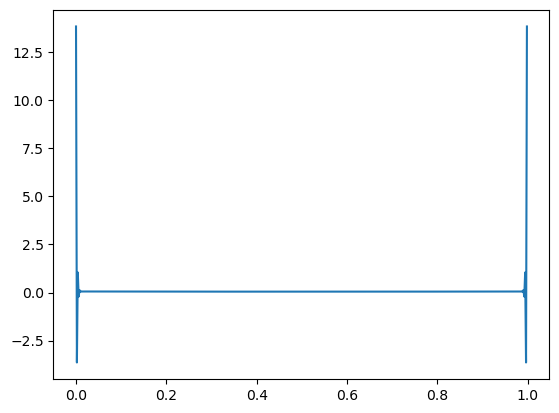

In [12]:
t = [i*T/N for i in range(N)]
plt.plot(t,v)

#### <font color=blue> Solution 1(c).</font>

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

- (a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
f(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

- (b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.

(Hint: Use `method = L-BFSG-L` and impose explicit bounds on the $x_i$.)

- (c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

- (d) Explain to your non-mathematical manager why this strategy has lower expected cost.

#### <font color=blue> Solution 2(a).</font>

As in the lecture, we have the expressions:
$$\begin{aligned} C_{i i} & =\frac{x_i}{t_i-t_{i-1}} f\left(v_i\right) \int_{t_{i-1}}^{t_i} d t \int_{t_{i-1}}^t \frac{1}{\sqrt{t-s}} d s \\ & =\frac{4}{3} x_i f\left(v_i\right) \sqrt{t_i-t_{i-1}} \\&=\frac{\sigma}{\sqrt{V}}x_i^{3/2}\end{aligned}$$
and
$$\begin{aligned} C_{j i}= & \frac{x_j}{t_j-t_{j-1}} f\left(v_i\right) \int_{t_{j-1}}^{t_j} d t \int_{t_{i-1}}^{t_i} \frac{1}{\sqrt{t-s}} d s \\ = & \frac{4}{3} x_j f\left(v_i\right) \times \\ & \frac{\left(t_j-t_{i-1}\right)^{3 / 2}-\left(t_j-t_i\right)^{3 / 2}-\left(t_{j-1}-t_{i-1}\right)^{3 / 2}+\left(t_{j-1}-t_i\right)^{3 / 2}}{t_j-t_{j-1}}\\&=\frac{\sigma}{\sqrt{V}}x_jx_i^{1/2}\frac{\left(t_j-t_{i-1}\right)^{3 / 2}-\left(t_j-t_i\right)^{3 / 2}-\left(t_{j-1}-t_{i-1}\right)^{3 / 2}+\left(t_{j-1}-t_i\right)^{3 / 2}}{(t_j-t_{j-1})(t_i-t_{i-1})^{1/2}}\end{aligned}$$
since we plug in $$f(v)=\frac{3}{4} \sigma \sqrt{\frac{v}{V}}=\frac{3}{4} \sigma \sqrt{\frac{\dot{x}}{V}} = \frac{3}{4} \sigma \sqrt{\frac{x}{V(t_i-t_{i-1})}}$$
In terms of $x_1,x_2,t_1,t_2$, we calculate every term of the sum.
$$\begin{align}C_{11}&=\frac{\sigma}{\sqrt{V}}x_1^{3/2}\\
C_{22}&=\frac{\sigma}{\sqrt{V}}x_2^{3/2}\\
C_{33}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)^{3/2}\\
C_{21}&=\frac{\sigma}{\sqrt{V}}x_2x_1^{1/2}\frac{t_2^{3 / 2}-\left(t_2-t_1\right)^{3 / 2}-t_1^{3 / 2}}{(t_2-t_1)t_1^{1/2}}\\
C_{32}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)x_2^{1/2}\frac{\left(T-t_1\right)^{3 / 2}-\left(T-t_2\right)^{3 / 2}-\left(t_2-t_1\right)^{3 / 2}}{(T-t_2)(t_2-t_1)^{1/2}}\\
C_{31}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)x_1^{1/2}\frac{T^{3 / 2}-\left(T-t_1\right)^{3 / 2}-t_2^{3 / 2}+\left(t_2-t_1\right)^{3 / 2}}{(T-t_{2})t_1^{1/2}}
\end{align}$$


#### <font color=blue> Solution 2(b).</font>

When $t_1=T/3$ and $t_2=2T/3$, we plug in and get:
$$\begin{align}
C_{21}&=\frac{\sigma}{\sqrt{V}}x_2x_1^{1/2}(2\sqrt{2}-2)\\
C_{32}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)x_2^{1/2}(2\sqrt{2}-2)\\
C_{31}&=\frac{\sigma}{\sqrt{V}}(X-x_1-x_2)x_1^{1/2}(3\sqrt{3}-4\sqrt{2}+1)
\end{align}$$
Thus we optimize the following total cost:
$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$
Here we assume the total order we have to split is $X=1$ and we do not include the common term $\frac{\sigma}{\sqrt{V}}$ in our optimization

In [22]:
from scipy.optimize import minimize

def obj(x):
    C11=x[0]**(3/2)
    C22=x[1]**(3/2)
    C33=(1-x[0]-x[1])**(3/2)
    C21=x[1]*(x[0]**(1/2))*((2**0.5)*2-2)
    C32=(1-x[0]-x[1])*(x[1]**(1/2))*((2**0.5)*2-2)
    C31=(1-x[0]-x[1])*(x[0]**(1/2))*((3**0.5)*3-(2**0.5)*4+1)
    return C11+C22+C33+C21+C32+C31

# Initial guesses for x and y
x0 = [0.1, 0.1]

# Bounds on the variables: (min, max)
bounds = [(0, 1), (0, 1)]

# Using 'L-BFGS-B' method with bounds
result = minimize(obj, x0, method='L-BFGS-B', bounds=bounds)

#Print the result
print("Status : ", result.message)
print("Solution: x = {:.6f}, y = {:.6f}".format(result.x[0], result.x[1]))
print("Minimum Value: {:.6f}".format(result.fun))

Status :  CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Solution: x = 0.647084, y = 0.000000
Minimum Value: 0.883282


#### <font color=blue> Solution 2(c).</font>

We get from lecture note that the cost of VWAP is$$\cC_{VWAP}=\frac{\sigma}{V}X^{3/2}$$and the cost of the optimized three split is $$\cC_{opt}=0.883282\frac{\sigma}{V}X^{3/2}$$
Thus the percentage saving is 
$$Saving\%=\frac{\cC{VWAP}-\cC_{opt}}{\cC{VWAP}}=11.6718\%$$

#### <font color=blue> Solution 2(d).</font>

When we submit an order, the market takes time to "recover" from the impact of the order. If we use VWAP strategy, we are continuously sending order, so we expose ourselves to more market impact of our order. If we use the three-split strategy, we do not submit order in the second period so that the price goes back to its original value more, and we'll cost less to trade in the price closer to the market price before our order.